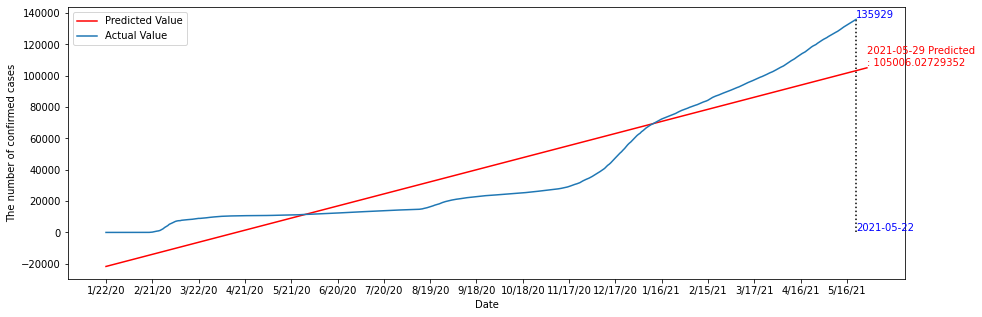

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(url, error_bad_lines=False)

df_korea = data[data['Country/Region'] == 'Korea, South']
df_korea = df_korea.T[4:]
df_korea = df_korea.reset_index().rename(columns={'index': 'date', 159: 'confirmed'})

#sklearn을 이용한 확진자 수 예측
x = np.array([i for i in range(len(df_korea.date))]).reshape(-1, 1)
y = np.array(df_korea.confirmed).reshape(-1, 1)
y_pred = np.array([i for i in range(len(df_korea.date)+7)]).reshape(-1, 1)

lr_mod = LinearRegression()
lr_mod.fit(x, y)
lr_act = lr_mod.predict(x)
lr_pred = lr_mod.predict(y_pred)

plt.figure(figsize=(15, 5))
plt.plot(lr_pred, color='r', label='Predicted Value')
plt.plot(df_korea.date, df_korea.confirmed, label='Actual Value')
plt.xticks(range(0, len(x)-1, 30))

date_pred = date.today()+timedelta(days=6)
date_act = date.today()-timedelta(days=1)
max_act = str(y[-1]).strip("[]")
max_pred = str(lr_pred[-1]).strip("[]")
plt.text(len(x)-1, y[-1], max_act, color='b', horizontalalignment='left', verticalalignment='bottom')
plt.text(len(x)-1, 0, date_act, color='b', horizontalalignment='left', verticalalignment='bottom')
plt.text(y_pred[-1], lr_pred[-1], str(date_pred) + " Predicted\n: " + max_pred, color='r', horizontalalignment='left', verticalalignment='bottom')

plt.xlabel('Date')
plt.ylabel('The number of confirmed cases')
plt.vlines(x=len(x)-1, ymin=0, ymax=y[-1], linestyles='dotted')

plt.legend()
plt.show()